In [3]:
import os
print("CWD =", os.getcwd())


CWD = /Users/qindaxian/Downloads/AU/deep learning/research project/earthworm/code/earthworm


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 👇 修改成你自己的文件名和类名
# 假设 EarthwormKeypoint 定义在 my_dataset_coco.py 里
from earthworm_dataset import EarthwormKeypoint



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/qindaxian/anaconda3/envs/python3.11/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/qindaxian/anaconda3/envs/python3.11/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/qindaxian/anaconda3/envs/python3.11/lib/python3.11/site-packages/ipykernel/kernelapp.py", lin

In [4]:
# 👇 根据你的实际路径修改
IMG_ROOT = "/Users/qindaxian/Downloads/AU/deep learning/research project/earthworm/code"  # 例如: "../skeletonisation_prototyping_test 2"
ANNO_XML = "/Users/qindaxian/Downloads/AU/deep learning/research project/earthworm/code/skeletonisation_prototyping_test 2/annotations 2.xml"

dataset = EarthwormKeypoint(
    img_root=IMG_ROOT,
    anno_xml_path=ANNO_XML,
    transforms=None,   
    fixed_size=(256, 192)       # 这里先不做 transforms，直接看原图上的点
)

print("Dataset size:", len(dataset))


>>> DEBUG img_root = /Users/qindaxian/Downloads/AU/deep learning/research project/earthworm/code
>>> DEBUG abs path = /Users/qindaxian/Downloads/AU/deep learning/research project/earthworm/code
Added: skeletonisation_prototyping_test 2/0001.jpg
Added: skeletonisation_prototyping_test 2/0002.jpg
Added: skeletonisation_prototyping_test 2/0003.jpg
Added: skeletonisation_prototyping_test 2/0004.jpg
Added: skeletonisation_prototyping_test 2/0005.jpg
Added: skeletonisation_prototyping_test 2/0006.jpg
Added: skeletonisation_prototyping_test 2/0007.jpg
Added: skeletonisation_prototyping_test 2/0008.jpg
Added: skeletonisation_prototyping_test 2/0009.jpg
Added: skeletonisation_prototyping_test 2/0010.jpg
Added: skeletonisation_prototyping_test 2/0011.jpg
Added: skeletonisation_prototyping_test 2/0012.jpg
Added: skeletonisation_prototyping_test 2/0013.jpg
Added: skeletonisation_prototyping_test 2/0014.jpg
Added: skeletonisation_prototyping_test 2/0015.jpg
Added: skeletonisation_prototyping_test 2

Image shape: (1734, 1734, 3)
Box: [0.0, 0.0, 1734.0, 1734.0]
Keypoints: [[1.32873e+03 5.88830e+02 1.00000e+00]
 [1.41300e+03 1.16400e+03 1.00000e+00]]


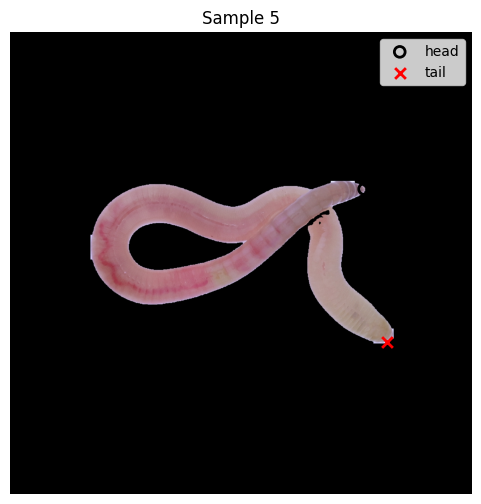

In [ ]:
# 可视化单张图片的 head / tail
idx = 5  # 👈 换成你想看的 index

img, target = dataset[idx]
print("Image shape:", img.shape)
print("Box:", target["box"])
print("Keypoints:", target["keypoints"])

kps = target["keypoints"]  # shape (2, 3) -> [x, y, v]

plt.figure(figsize=(6, 6))
plt.imshow(img)  # 如果颜色反了，就改成: plt.imshow(img[:, :, ::-1])
plt.axis("off")

head_x, head_y, _ = kps[0]
tail_x, tail_y, _ = kps[1]

plt.scatter([head_x], [head_y], s=60, marker="o",
            edgecolors="red", facecolors="none",
            linewidths=2, label="head")
plt.scatter([tail_x], [tail_y], s=60, marker="x",
            c="red", linewidths=2, label="tail")
plt.legend()
plt.title(f"Sample {idx}")
plt.show()
